# Instructions

We are asking you to conduct some introductory analyses into the dataset(s) and to report back your results. Specifically, the information we would like to see is:


1. Focusing on the data available for all ages, what does the distribution of unemployment rates look like among the different major categories? Come up with a graphical display that allows a reader to easily make sense of the information. 


2. In addition to the comprehensive, all-ages dataset, the github repository also contains data regarding just recent college graduates (ages < 28). Comparing this subset of data to the whole dataset that it comes from (all-ages) can provide us with some information about recent trends. Which majors appear to have experienced a relative boom among recent graduates and which majors are dropping off in popularity? Again, explore visual ways of describing the answer as well as numerical ones.


3. (Bonus)   The previous two questions deal with only a small subset of the data contained in the repository. If you have some extra time (this question isn’t required for the application), we would be curious to see something else interesting you found while exploring the data. Additionally, if there are other variables or similar data sets that you could see being useful to add to this data set, feel free to mention them here! What would you use this additional data for? (Don’t worry, you don’t need to actually do the linking, this is more of a hypothetical question).


# Question 1

In [98]:
#import statements
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
all_ages = pd.read_csv("all-ages.csv")

In [4]:
AA_MC = all_ages.groupby("Major_category")

In [97]:
AA_MC.Unemployment_rate.describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Major_category,,,,,,,,
Arts,8.0,0.087601,0.030097,0.054719,0.073378,0.081994,0.087879,0.156147
Psychology & Social Work,9.0,0.077867,0.012738,0.059376,0.069667,0.075631,0.083629,0.102712
Interdisciplinary,1.0,0.077269,NaN,0.077269,0.077269,0.077269,0.077269,0.077269
Humanities & Liberal Arts,15.0,0.069429,0.009543,0.042505,0.066715,0.072374,0.074675,0.081348
Communications & Journalism,4.0,0.069125,0.009504,0.061917,0.063749,0.065788,0.071163,0.083005
Law & Public Policy,5.0,0.067854,0.009070,0.054036,0.066513,0.069655,0.069848,0.079217
Social Science,9.0,0.065686,0.005278,0.054399,0.064519,0.065804,0.069374,0.071057
Computers & Mathematics,11.0,0.059437,0.018172,0.024900,0.052366,0.055653,0.066870,0.090264
Industrial Arts & Consumer Services,7.0,0.058546,0.019373,0.046903,0.049180,0.052034,0.055363,0.101796


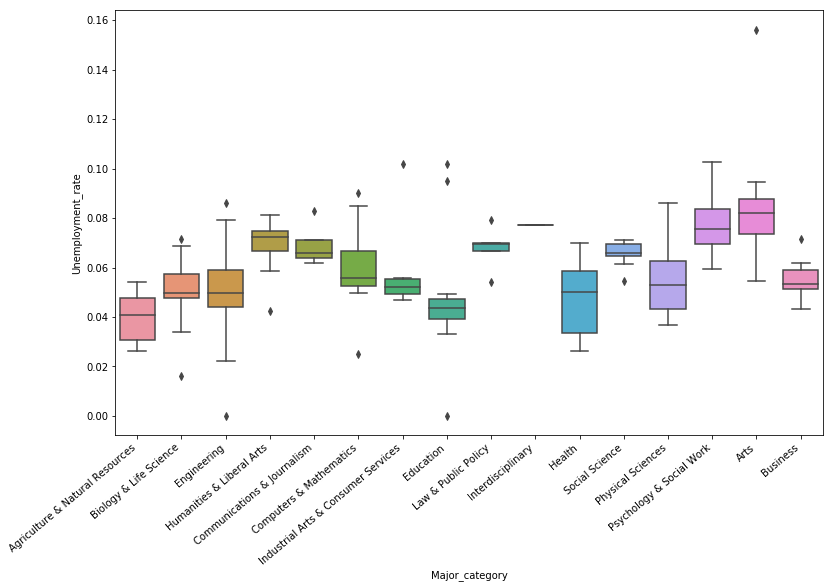

In [6]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(x=all_ages.Major_category, y=all_ages.Unemployment_rate, orient='v')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### Interpretation

The graph above shows the distribution of unemployment rates by major category. Above the graph, we have the descriptive statistics for each major category, organized so that the highest average unemployment rate is at the top and the lowest is at the bottom. From this, we can see that the following major categories have the highest unemployment rates among all ages: 

* Arts
* Pyschology & Social Work
* Interdisciplinary
* Humanities & Liberal Arts
* Communications & Journalism


# Question 2

In [47]:
recent_grads = pd.read_csv("recent-grads.csv")

In [62]:
total_recentgrads = recent_grads.Total.sum()
total_allages = all_ages.Total.sum()
total_allages = total_allages.astype(float)
print("Total Recent Grads:", total_recentgrads, ", Total All Grads:", total_allages)

Total Recent Grads: 6771654.0 , Total All Grads: 39834398.0


In [68]:
recent_grads.sort_values('Major_code')
all_ages.sort_values('Major_code')
print("all sorted!")

all sorted!


In [70]:
rg_proportions = []
for i in recent_grads.Total: 
    i = i/total_recentgrads
    rg_proportions.append(i)
    
aa_proportions = []
for i in all_ages.Total:
    i = i/total_allages
    aa_proportions.append(i)

all_majors = []
for i in all_ages.Major: 
    all_majors.append(i)
    
all_categories = []
for i in all_ages.Major_category: 
    all_categories.append(i)

In [88]:
data2 = {'Major': all_majors,
         'Major Categories': all_categories,
        'Recent Grads Proportions': rg_proportions, 
        'All Ages Proportions': aa_proportions} 

In [89]:
df = pd.DataFrame(data2)
df.head()

,Major,Major Categories,Recent Grads Proportions,All Ages Proportions
0,GENERAL AGRICULTURE,Agriculture & Natural Resources,0.000345,0.003217
1,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,0.000112,0.002393
2,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,0.000126,0.000852
3,ANIMAL SCIENCES,Agriculture & Natural Resources,0.000186,0.002599
4,FOOD SCIENCE,Agriculture & Natural Resources,0.004764,0.000610


In [86]:
df2 = pd.melt(df, id_vars="Major Categories", var_name="Dataset", value_name="Relative Popularity")

In [95]:
df["difference"] = df["Recent Grads Proportions"] - df["All Ages Proportions"]
df.sort_values("difference", ascending=False)

,Major,Major Categories,Recent Grads Proportions,All Ages Proportions,difference
145,STUDIO ARTS,Arts,0.058145,0.002034,0.056111
76,HUMANITIES,Humanities & Liberal Arts,0.048722,0.001160,0.047562
123,PUBLIC POLICY,Law & Public Policy,0.041454,0.000371,0.041082
57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,0.034643,0.000404,0.034239
93,MILITARY TECHNOLOGIES,Industrial Arts & Consumer Services,0.031602,0.000108,0.031493
77,LIBRARY SCIENCE,Education,0.030304,0.000407,0.029898
34,SPECIAL NEEDS EDUCATION,Education,0.030922,0.003758,0.027164
137,TRANSPORTATION SCIENCES AND TECHNOLOGIES,Industrial Arts & Consumer Services,0.028748,0.003179,0.025569
35,SOCIAL SCIENCE OR HISTORY TEACHER EDUCATION,Education,0.025770,0.003189,0.022581
94,MULTI/INTERDISCIPLINARY STUDIES,Interdisciplinary,0.022568,0.001135,0.021434


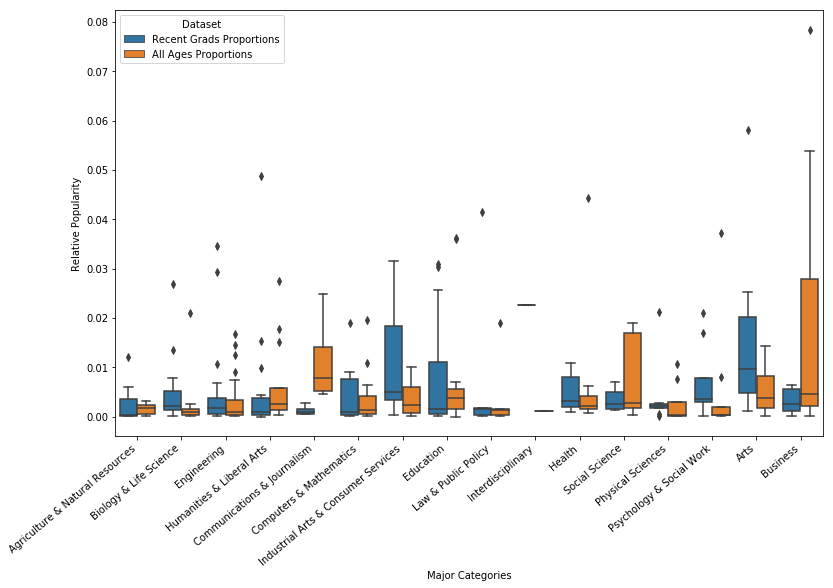

In [87]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(x='Major Categories', y='Relative Popularity', hue='Dataset', data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### Interpretation

Because there are so many majors, I thought the visual would be meaningless unless the majors were grouped into major categories. Here I made side by side bar graphs that help people see how popular major categories are among all ages and recent graduates. 

However, I did look at individual majors numerically. Above is a chart of all 172 majors available in both datasets, the proportions of graduates in each major compared to the dataset the numbers come from, and the difference in proportions. Any major that has a positive number in the "difference" column became more popular recently. The top ten majors that had a notably high increase in popularity are:

* Studio Arts
* Humanities
* Public Policy 
* Naval Architecture and Marine Engineering
* Military Technologies
* Library Science
* Special Needs Education
* Transportation Sciences and Technologies
* Social Science or History Education
* Interdisciplinary Studies

Above the bargraph, the dataframe is sorted from highest increase in popularity to lowest increase in popularity, so if you would like to look at other majors that increased in popularity please reference that. 

# Bonus Question

Because I accidentally misterpreted the second question at first, I actually had the opportunity to look at the difference in unemployment rates between the "all ages" and "recent grads" dataset by major category. The boxplot is shown below. 

From this boxplot, we can see that unfortunately, many disciplines are suffering from higher unemployment rates. However. recent graduates within the Humanities & Liberal Arts, Communications & Journalism, and Social Science categories have lower unemployment rates on average. 

I noticed that there is an additional data set of women in STEM and graduate students. I would be curious to see the unemployment rates split up by gender, especially for women in STEM. Would there be a greater commitment to hiring women in STEM more recently comepared the all ages dataset? How do unemployment rates in major categories fluctuate as someone gains a master degree or PhD? 

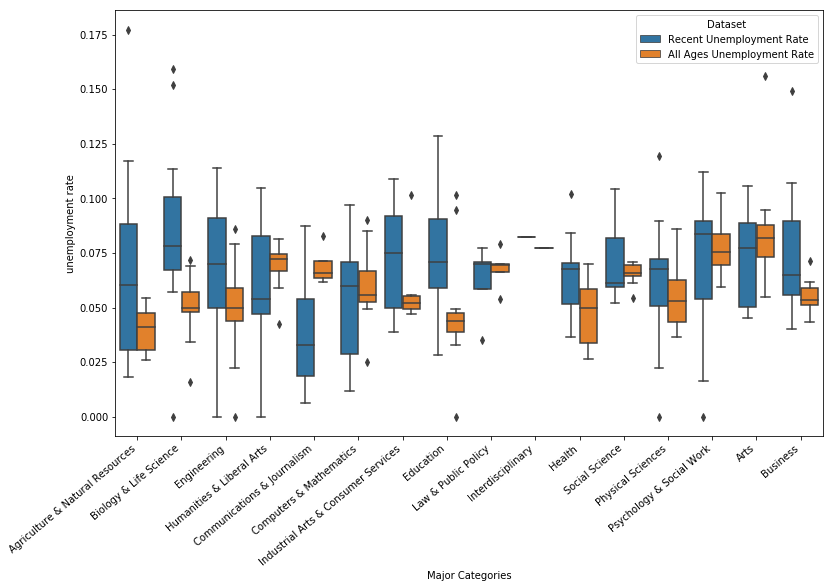

In [13]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(x='Major Categories', y='unemployment rate', hue='Dataset', data=df2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()